In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as pyplot

In [5]:
#Read in the dataset
df = pd.read_csv("attrition.csv", index_col = [0])
df.describe()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7500.000000,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268
std,4329.982679,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281
min,1.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,3750.500000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,7500.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,11249.500000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,14999.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


<AxesSubplot:>

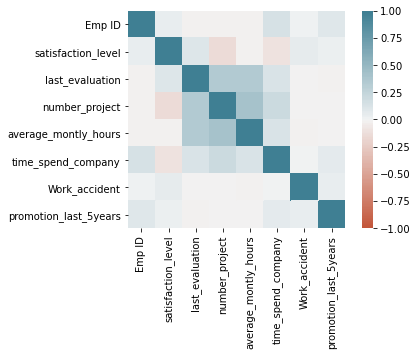

In [6]:
#Some correlation stats
cor = df.corr()

sns.heatmap(cor, 
            vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)

In [7]:
df.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,status
1,2001,0.58,0.74,4,215,3,0,0,sales,low,exist
2,2002,0.82,0.67,2,202,3,0,0,sales,low,exist
3,2003,0.45,0.69,5,193,3,0,0,sales,low,exist
4,2004,0.78,0.82,5,247,3,0,0,sales,low,exist
5,2005,0.49,0.60,3,214,2,0,0,sales,low,exist


In [9]:
#Encode the salary column
lb_maker = LabelEncoder()
df["salary"] = lb_maker.fit_transform(df["salary"])

df.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,status
1,2001,0.58,0.74,4,215,3,0,0,sales,1,exist
2,2002,0.82,0.67,2,202,3,0,0,sales,1,exist
3,2003,0.45,0.69,5,193,3,0,0,sales,1,exist
4,2004,0.78,0.82,5,247,3,0,0,sales,1,exist
5,2005,0.49,0.60,3,214,2,0,0,sales,1,exist


In [21]:
#Encode the department column
df["dept"] = lb_maker.fit_transform(df["dept"])

In [25]:
#Examine data after encoding the status column
df["status"] = lb_maker.fit_transform(df["status"])

#or

#Encoding the status column
#df["status"] = np.where(df["status"] ==  "left", 0, 1)

In [26]:
#Examine new data
df.describe()

,Unnamed: 0,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,status
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7500.000000,7500.000000,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,5.870525,1.347290,0.238083
std,4329.982679,4329.982679,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,2.868786,0.625819,0.425924
min,1.000000,1.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3750.500000,3750.500000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,4.000000,1.000000,0.000000
50%,7500.000000,7500.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,7.000000,1.000000,0.000000
75%,11249.500000,11249.500000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,8.000000,2.000000,0.000000
max,14999.000000,14999.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,9.000000,2.000000,1.000000


In [37]:
#Moving to extract the needed column
df2 = df.iloc[:, 2:]

#examine new dataset
df2.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,status
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,5.870525,1.347290,0.238083
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,2.868786,0.625819,0.425924
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,4.000000,1.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,7.000000,1.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,8.000000,2.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,9.000000,2.000000,1.000000


In [65]:
#Convert to array
array = df2.values

#Spliiting the dataset
X = array[:,0:9]
y = array[:,9]

#Traintest
X_train, X_validation, y_train, y_validation = train_test_split(X, y, random_state = 1, test_size = 0.20)

In [75]:
#Import all neccessary model for training
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [78]:
#Append all needed models
models = []
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(("LR", LogisticRegression(solver = "liblinear", multi_class = "ovr")))
models.append(("KNN", KNeighborsClassifier()))
models.append(("CART", DecisionTreeClassifier()))
models.append(("NB", GaussianNB()))
models.append(("SVM", SVC(gamma ="auto")))
models.append(("RF", RandomForestClassifier(n_estimators = 100)))

In [79]:
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits = 10, random_state = 1, shuffle = True)
    cv_results = cross_val_score(model, X_train, y_train, cv = kfold, scoring = "accuracy")
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LDA: 0.765148 (0.008840)
LR: 0.768148 (0.009994)
KNN: 0.930828 (0.009403)
CART: 0.976332 (0.004235)
NB: 0.800234 (0.009141)
SVM: 0.946579 (0.008882)
RF: 0.990915 (0.002751)


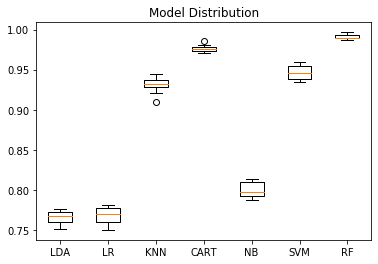

In [80]:
#A useful way to compare the samples of results for each algorithm is to create a box 
#and whisker plot for each distribution and compare the distributions.
pyplot.boxplot(results, labels = names)
pyplot.title("Model Distribution")
pyplot.show()

In [83]:
#Lets make some prediction with the model
model = RandomForestClassifier(n_estimators = 100)

model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [85]:
#Make predictions
prediction = model.predict(X_validation)

In [87]:
#Examine a confusion matrix
confusion_matrix(prediction, y_validation)

array([[2271,   16],
       [   5,  708]], dtype=int64)

In [88]:
#test accuracy
print(accuracy_score(y_validation, prediction))

0.993


In [89]:
print(classification_report(y_validation, prediction))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      2276
         1.0       0.99      0.98      0.99       724

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000

